### 1. Introduction to Image I/O in OpenCV
OpenCV provides two main functions for handling image I/O:

- **cv2.imread()** – Used to read an image from a file.
- **cv2.imwrite()** – Used to write an image to a file.

### 2. Setting Up the Environment
```pip install opencv-python```

### 3. Reading and Writing Images
##### Reading an Image
- Use `cv2.imread()` to read an image from a file:


### Load Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os, sys

# Manually specify the path to the project directory
project_path = '../../'

# Add the project directory to sys.path
sys.path.append(project_path)
from mansoor import Repeatable

### Create instance of Repeatable

In [2]:
r = Repeatable(base_path='../../data/images/')

### Read an image from file

In [3]:
image = r.load_image('1.jpg')

In [4]:
print(f"Loading image from: {r.base_path + '2.jpeg'}")


Loading image from: ../../data/images/2.jpeg


### Display the image using matplotlib

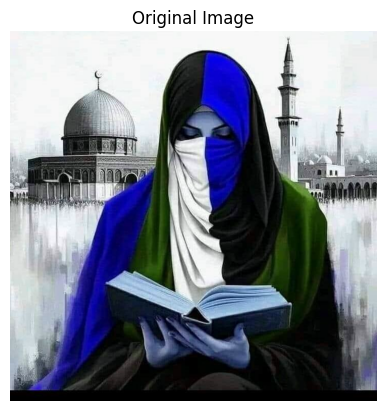

In [5]:
plt.imshow(image)  
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

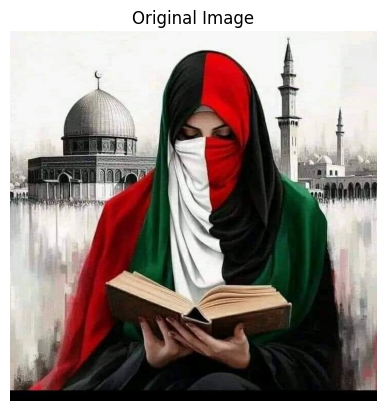

In [6]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

**Note:** OpenCV loads images in `BGR` format by default, while Matplotlib expects `RGB`. Hence, we use `cv2.cvtColor()` to convert the image from BGR to RGB for displaying.


### Writing an Image
- To write an image back to disk, use `cv2.imwrite()`

In [7]:
os.makedirs('../output', exist_ok=True)

In [8]:
cv2.imwrite('../output/1.png', image)

True

This will save the image to a file named `1.png` in the `output` directory.

### 4. Working with Image Arrays in NumPy
Images are represented as NumPy arrays. Each pixel is represented as a set of values, and the structure of the image depends on its color space.

**Creating a Blank Image (Black Square)**

- You can create an empty image (a black square) using NumPy's zeros function

In [9]:
black_square = np.zeros((3, 3), dtype=np.uint8)

In [10]:
black_square

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [11]:
black_square.shape

(3, 3)

#### Creating a Black Square Image with 3 Channels (BGR)

In [12]:
black_square_bgr = np.zeros((3, 3, 3), dtype=np.uint8)
black_square_bgr

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [13]:
black_square_bgr.shape

(3, 3, 3)

Now, each pixel has 3 values: `[B, G, R]`

#### Converting Color Spaces (BGR to RGB)
To convert the color format from `BGR to RGB` (as OpenCV uses BGR by default), we use `cv2.cvtColor()`

In [14]:
rgb_image = cv2.cvtColor(black_square_bgr, cv2.COLOR_BGR2RGB)

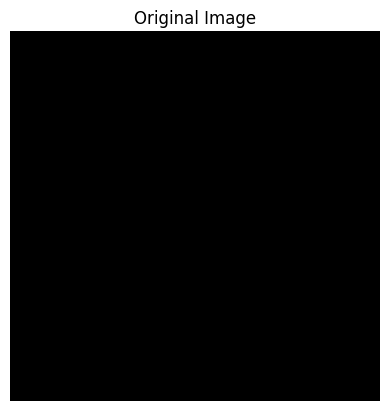

In [15]:
plt.imshow(rgb_image)
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

#### Image color representation in hsv

In [16]:
# Convert BGR to HSV
hsv_image = cv2.cvtColor(black_square_bgr, cv2.COLOR_BGR2HSV)

##### HSV format uses:

- **Hue (H)** – represents the color type (range from 0-180 in OpenCV).
- **Saturation (S)** – represents the intensity or vividness of the color (range from 0-255).
- **Value (V)** – represents the brightness of the color (range from 0-255).

#### Summary of Key Functions Till Now

| Function               | Purpose                                                           |
|------------------------|-------------------------------------------------------------------|
| `cv2.imread()`          | Read an image from a file (in BGR format).                        |
| `cv2.imwrite()`         | Write an image to a file.                                         |
| `cv2.cvtColor()`        | Convert between color spaces (e.g., BGR to RGB).                  |
| `cv2.imshow()`          | Display an image in an OpenCV window.                               |


### 5. Inspecting the Image Structure: Using the shape Property

The `.shape` property in NumPy allows you to inspect the dimensions of an image `(height, width, and number of channels).`

In [17]:
img = np.zeros((3, 3), dtype=np.uint8)
# Check the shape of the image (should print (3, 3))
print("Shape of grayscale image:", img.shape)

Shape of grayscale image: (3, 3)


In [18]:
# Convert the grayscale image to BGR (3 channels)
img_bgr = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Check the shape of the BGR image (should print (3, 3, 3))
print("Shape of BGR image:", img_bgr.shape)

Shape of BGR image: (3, 3, 3)


### Explanation:

- **img.shape** for a grayscale image returns `(height, width)`.
- **img_bgr.shape** for a BGR image returns `(height, width, 3)` because BGR images have three color channels `(Blue, Green, Red)`.

### 6. Reading and Saving Images in Different Formats
You can use `cv2.imread()` to read an image, and `cv2.imwrite()` to save it in different formats. Here's how to load a PNG image and save it as a JPEG.



In [19]:
image = cv2.imread('../../data/images/1.jpg', cv2.COLOR_RGB2BGR) # Read image in jpg format

In [20]:
cv2.imwrite('../output/01.png', image) # Save image in png format

True

#### Explanation:

- cv2.imread() loads the image.
- cv2.imwrite() saves the image in a new format.

#### Reading Images in Different Color Modes
OpenCV allows you to specify the mode in which the image should be loaded using the `cv2.IMREAD_*` options. For example, you can load an image as grayscale or with an alpha channel.

In [21]:
gray_image = cv2.imread('../../data/images/1.jpg', cv2.IMREAD_GRAYSCALE)

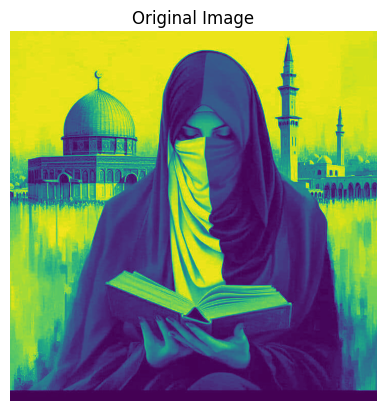

In [22]:
plt.imshow(gray_image)  
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

#### Explanation:

- **cv2.IMREAD_GRAYSCALE** loads the image in grayscale.
- By loading the image as grayscale, any color information is discarded.

#### Available Read Modes:
- **cv2.IMREAD_COLOR:** Default. Loads the image in color (BGR).
- **cv2.IMREAD_GRAYSCALE:** Loads the image as grayscale (single channel).
- **cv2.IMREAD_UNCHANGED:** Loads the image as is, including alpha channel (transparency).

### 7. Handling Raw Bytes and Converting Between Byte Arrays
You can convert an image to raw bytes and vice versa. This is useful for network transmission or saving images in a custom format.

In [23]:
randomByteArray = bytearray(os.urandom(120000)) 

In [24]:
# Convert the byte array to a flat NumPy array
flatNumpyArray = np.array(randomByteArray, dtype=np.uint8)

In [25]:
# Convert to a 400x300 grayscale image (2D array)
grayImage = flatNumpyArray.reshape(300, 400)

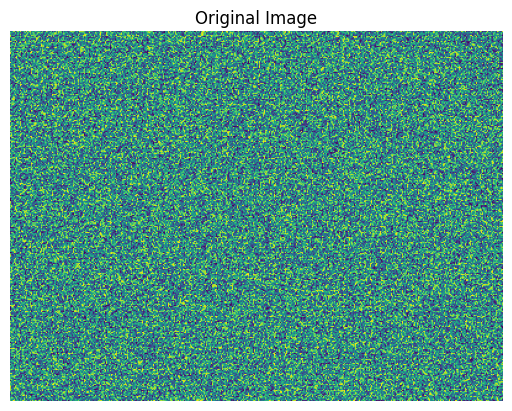

In [26]:
plt.imshow(grayImage)  
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

In [27]:
# Step 3: Convert to a 400x100 color image (3D array)
bgrImage = flatNumpyArray.reshape(100, 400, 3)

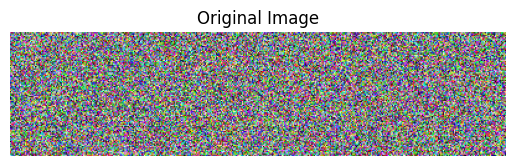

In [28]:
plt.imshow(bgrImage)  
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

### Explanation:

- os.urandom(120000) generates 120,000 random bytes.
- np.array(randomByteArray, dtype=np.uint8) converts the byte array to a NumPy array with unsigned 8-bit integers.
- The grayscale image is created by reshaping the array into a 300x400 2D array, while the color image is reshaped into a 100x400x3 3D array (BGR format).

### 8. Access image data with numpy array

Once you have loaded an image into OpenCV using `cv2.imread()`, you can access and modify its pixel data using NumPy operations.

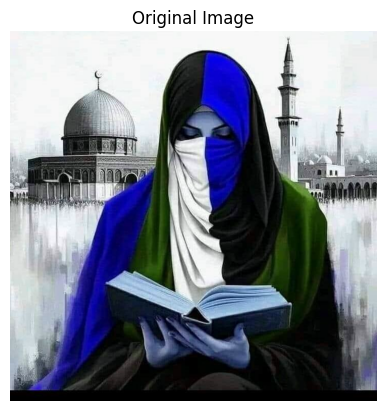

In [29]:
plt.imshow(image)  
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

In [30]:
# Modify the pixel at position (0, 0) to white
image[0, 0] = [255, 0, 0]
image[0, 1] = [255, 0, 0]
image[0, 2] = [255, 0, 0]
image[0, 3] = [255, 0, 0]

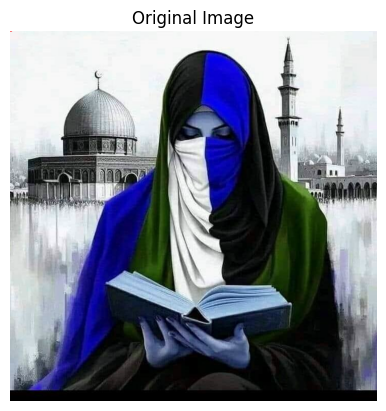

In [31]:
plt.imshow(image)  
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

### Manipulating Individual Pixels Using NumPy
OpenCV images are NumPy arrays, so you can use NumPy functions to access and modify pixel values. For example, you can change the value of a specific pixel.

In [32]:
# Print the value of the pixel at (150, 120, 0) - Blue channel
print("Original Blue value at (150, 120):", image[150, 120, 0])

Original Blue value at (150, 120): 197


In [33]:
# Change the Blue value to 255 (full intensity)
image[150, 120, 0] = 0

In [34]:
# Print the updated value
print("Updated Blue value at (150, 120):", image[150, 120, 0])

Updated Blue value at (150, 120): 0


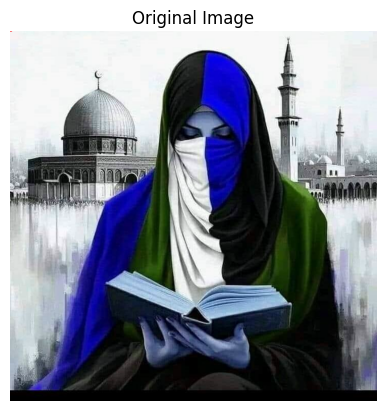

In [35]:
plt.imshow(image)  
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

### 9. Using item() and itemset() for Pixel Manipulation
NumPy provides the `item()` and `itemset()` methods to get and set pixel values more efficiently, especially for single pixels.

In [36]:
blue_value = bgrImage.item(90, 120, 0)  # 0 refers to the blue channel
blue_value

172

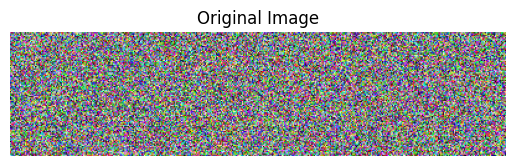

In [37]:
plt.imshow(bgrImage)  
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

In [38]:
# Change the blue channel value to 255 (maximum intensity)
image.itemset((90, 120, 0), 255)

In [39]:
# Verify the change
blue_value = image.item(90, 120, 0)
print("Updated Blue Value at (150, 120):", blue_value)

Updated Blue Value at (150, 120): 255


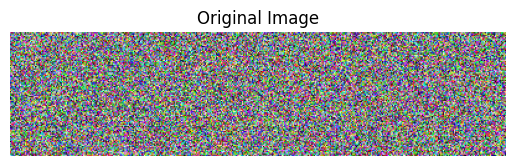

In [40]:
plt.imshow(bgrImage)  
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

### Explanation:

- `image.item(150, 120, 0)` retrieves the blue channel value of the pixel at coordinates `(150, 120)`.
- `image.itemset((150, 120, 0), 255)` sets the blue channel value to `255` for the same pixel.
- This method can be more efficient for pixel-level operations compared to directly indexing with `image[y, x]`.


### 9. Zeroing Out Channels (Manipulating Color Channels)
Sometimes, you may want to manipulate entire color channels (e.g., making the image grayscale by zeroing out certain channels).

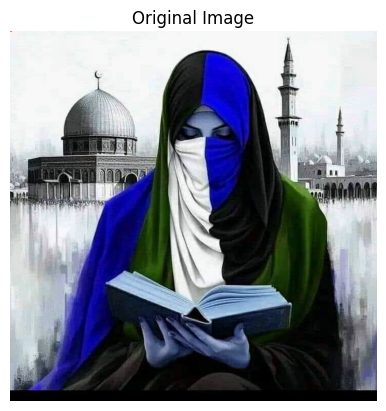

In [41]:
plt.imshow(image)  
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

In [42]:
# Zero out the blue and red channels to make the image grayscale (just green)
image[:, :, 0] = 0  # Zero the Blue channel
image[:, :, 2] = 0  # Zero the Red channel

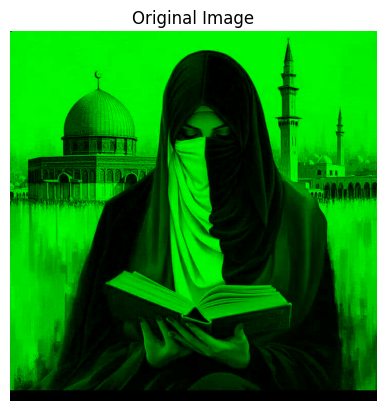

In [43]:
plt.imshow(image)  
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

### Explanation:

- `image[:, :, 0] = 0` sets all blue channel values to 0 (removes blue from the image).
- `image[:, :, 2] = 0` sets all red channel values to 0 (removes red from the image).
- This leaves only the green channel, creating a grayscale-like effect but still in the BGR color space.

### 10. Iterating Over the Image with NumPy for Bulk Manipulation
You can also iterate over the image for bulk manipulations, like adjusting brightness, contrast, or applying filters. For example, increasing the brightness of the entire image by adding a value to all pixels.

In [44]:
# Increase the brightness of the entire image by adding 50 to each pixel's value
image_bright = np.clip(image + 50, 0, 255).astype(np.uint8)

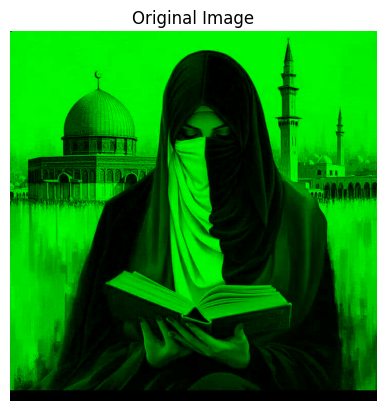

In [45]:
plt.imshow(image)  
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

### Explanation:

- `image + 50` adds 50 to each pixel's RGB values.
- **np.clip()** ensures the pixel values stay within the valid range of `0 to 255`.
- **astype(np.uint8)** converts the array back to the correct data type for image representation.

#### Summary of Key NumPy Operations on Images

| Operation                          | Code Example                                                           |
|-------------------------------------|------------------------------------------------------------------------|
| **Load an image**                   | `image = cv2.imread('image.png')`                                      |
| **Get image shape**                 | `image.shape`                                                          |
| **Access pixel value**              | `image[y, x]` (For color, use `image[y, x, channel]`)                  |
| **Modify pixel value**              | `image[y, x] = [B, G, R]`                                              |
| **Use item() for pixel access**     | `image.item(y, x, channel)`                                            |
| **Use itemset() to modify pixel**   | `image.itemset((y, x, channel), value)`                                |
| **Zero out a color channel**        | `image[:, :, 0] = 0` (Zero Blue channel)                               |
| **Change brightness**               | `np.clip(image + value, 0, 255)`                                       |


---

## Practical Exercise
- Create a function that converts any given image to grayscale by zeroing out the red and blue channels.
- Apply a random noise filter to a grayscale image by adding random values between 0-255 to each pixel and clipping the result.

---

### 11. Efficient Channel Manipulation Using NumPy Indexing

In [46]:
image = r.load_image('1.jpg')

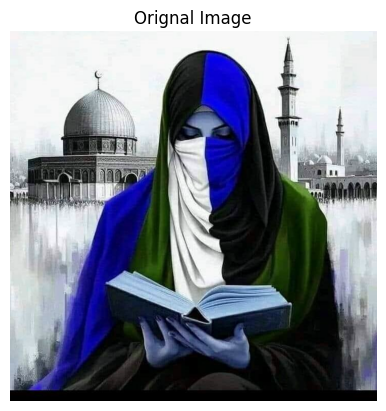

In [47]:
plt.imshow(image)  
plt.title('Orignal Image')
plt.axis('off')  # Hide axes
plt.show()

In [48]:
# Set all green values (index 1 in BGR) to 0
image[:, :, 1] = 0

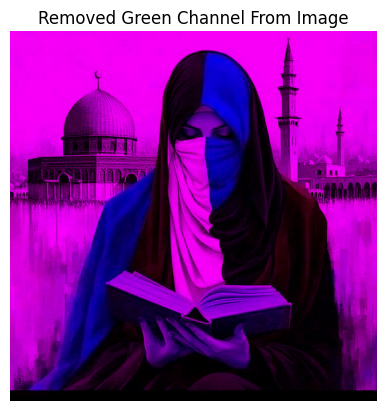

In [49]:
plt.imshow(image)  
plt.title('Removed Green Channel From Image')
plt.axis('off')  # Hide axes
plt.show()

### Explanation
- `img[:, :, 1] = 0` modifies the entire green channel of the image to zero. The notation `[:, :, 1]` selects all pixels (rows and columns) in the green channel (1 is the index for G in BGR format).
- The result will be an image where the green color is completely removed.

### 12. Defining and Copying Regions of Interest (ROI)
A **Region of Interest (ROI)** is a portion of the image that you can extract and manipulate. You can define an ROI and perform operations like copying or modifying it. Here's how to define a region of the image and copy it to another part of the image.

In [50]:
# Define a region of interest (ROI) from rows 100 to 200 and columns 100 to 200
roi = image[100:200, 100:200]

In [51]:
image[300:400, 300:400] = roi

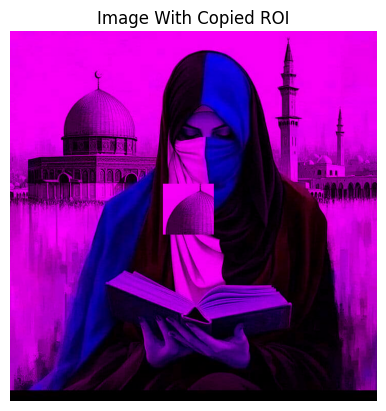

In [52]:
plt.imshow(image)  
plt.title('Image With Copied ROI')
plt.axis('off')  # Hide axes
plt.show()

### Explanation:

- `img[100:200, 100:200]` extracts a sub-array (or ROI) from the image, selecting the pixels between rows `100 and 200` and columns `100 and 200`.
- `img[300:400, 300:400] = roi` places the ROI into a new location of the image (from rows `300 to 400` and columns `300 to 400`).
- This operation copies a region from one part of the image and pastes it into another.
- **Important Note:** The source ROI and the destination region must have the same size; otherwise, NumPy will raise an error.

### 13. Accessing Image Properties
You can access important properties of the image, such as its **shape**, **size**, and **data type**. These properties help in understanding the structure and characteristics of the image you're working with.

In [53]:
# Access and print image properties
print('Image Shape:', image.shape)  # Height, Width, Channels
print('Image Size:', image.size)    # Total number of pixels (height * width * channels)
print('Image Data Type:', image.dtype)  # Data type of image (typically uint8)

Image Shape: (727, 720, 3)
Image Size: 1570320
Image Data Type: uint8


### Explanation:

- **Shape (img.shape):** Returns the dimensions of the image as a tuple (height, width, channels). If it's a grayscale image, the tuple will only contain (height, width).
- **Size (img.size):** Returns the total number of elements (pixels) in the image. This is the product of height, width, and the number of channels.
- **Data Type (img.dtype):** The data type of the image, which is typically uint8 (unsigned 8-bit integer) for 8-bit images, meaning pixel values range from 0 to 255.

### 14. Avoiding Slow Operations with Loops
As mentioned, **loops** for pixel manipulation can be very slow, especially when working with large images or video streams. Instead, use **vectorized operations** like NumPy indexing, which are implemented in C and run much faster. Here's a comparison:

#### Slow Loop-Based Approach:

In [54]:
# Slow loop for changing pixel values (avoid this)
for y in range(image.shape[0]):  # Loop over rows
    for x in range(image.shape[1]):  # Loop over columns
        image[y, x, 1] = 0  # Set green channel to 0 for each pixel

#### Fast NumPy Indexing:

In [55]:
# Efficient NumPy indexing approach (preferred)
image[:, :, 1] = 0  # Set green channel to 0 for all pixels

**Using loops for pixel manipulation is highly inefficient and will cause performance issues, especially when dealing with videos. Instead, vectorized operations (like array slicing and indexing) are the way to go for real-time processing.**

---
### Practical Exercise:
- **Task 1:** Create a function that accepts an image and a color channel (B, G, or R), and sets all values of the specified channel to zero.
- **Task 2:** Extract a region from the center of the image and copy it to another part of the image, creating a "patch" effect.
- **Task 3:** Use NumPy's indexing to convert the image to grayscale by setting the red and blue channels to zero.

---


The OpenCV **VideoCapture** and **VideoWriter** classes are powerful tools for working with video files and camera streams. They allow you to read frames from a video, manipulate or process them, and then write the processed frames back into a video file. Let's break down the key concepts and provide clear examples for how to `read and write video` files as well as `capture video` from a camera.

### Reading and Writing Video Files
- OpenCV provides the VideoCapture class to read frames from a `video file` and the `VideoWriter` class to write frames to a video file.

### 1. Reading from a Video File
You can use the VideoCapture class to read frames from an existing video. The `read()` method allows you to retrieve the next frame in the video. 

In [56]:
# Open the video file
video_capture = cv2.VideoCapture('../../data/video/1.mp4')

In [57]:
# Get the FPS (frames per second) and frame size (width, height)
fps = video_capture.get(cv2.CAP_PROP_FPS)
width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

In [58]:
print('fps: ',fps)
print('width: ',width)
print('height: ',height)

fps:  0.0
width:  0
height:  0


In [59]:
# Set up the VideoWriter to save the output video
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec for the output video
video_writer = cv2.VideoWriter('../output/MyOutputVid.avi', fourcc, fps, (width, height))

In [60]:
# Read frames from the input video
success, frame = video_capture.read()

In [61]:
while success:
    # Write each frame to the output video
    video_writer.write(frame)

    # Read the next frame
    success, frame = video_capture.read()

# Release the VideoCapture and VideoWriter objects
video_capture.release()
video_writer.release()

### Key Points:
- **cv2.VideoCapture('filename'):** Opens the video file for reading.
- **video_capture.get(cv2.CAP_PROP_FPS):** Retrieves the frames per second (FPS) of the video.
- **video_capture.get(cv2.CAP_PROP_FRAME_WIDTH) and video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT):** Retrieve the width and height of the video frames.
- **cv2.VideoWriter_fourcc(*'XVID'):** Specifies the codec for video encoding (in this case, XVID codec).
- **video_writer.write(frame):** Writes each frame to the output video.

### 2. Writing to a Video File
The **cv2.VideoWriter** class allows you to save a series of frames to a video file. When creating a VideoWriter object, you need to specify:

- The filename for the output video.
- The codec to use for the video.
- The frame rate (FPS) for the video.
- The frame size (width, height).

In [62]:
# Open the camera
camera_capture = cv2.VideoCapture(0)  # '0' refers to the default camera

In [63]:
# Get the FPS (assuming 30 FPS) and frame size (width, height)
fps = 30
width = int(camera_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(camera_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

In [64]:
# Set up the VideoWriter to save the video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video_writer = cv2.VideoWriter('../output/CameraOutputVid.avi', fourcc, fps, (width, height))

In [65]:
# Capture video for 10 seconds
success, frame = camera_capture.read()
num_frames_remaining = 10 * fps  # 10 seconds at 30 FPS

In [66]:
while success and num_frames_remaining > 0:
    # Write the frame to the output video
    video_writer.write(frame)

    # Read the next frame
    success, frame = camera_capture.read()
    num_frames_remaining -= 1

# Release the VideoCapture and VideoWriter objects
camera_capture.release()
video_writer.release()

KeyboardInterrupt: 

### Key Points:
- **cv2.VideoCapture(0):** Opens the default camera (usually the built-in webcam). You can use other integers for additional cameras (e.g., cv2.VideoCapture(1) for the second camera).
- **Assumed FPS:** For cameras, OpenCV might not always return an accurate FPS using get(), so you may need to assume an FPS value (like 30 in the example above).
- **video_writer.write(frame):** Writes the captured frame to the output file.

### 3. Camera Frames and Synchronization
When working with multiple cameras, you might need to synchronize frames from each camera. Instead of using read(), which retrieves a frame and waits for it to be available, you can use `grab()` and `retrieve()` for more control.

In [ ]:
# Open two cameras
camera_capture0 = cv2.VideoCapture(0)
camera_capture1 = cv2.VideoCapture(1)

# Ensure both cameras opened correctly
if not camera_capture0.isOpened() or not camera_capture1.isOpened():
    print("Error: Could not open one or both cameras.")
    exit()

# Set up VideoWriter (assuming both cameras have the same resolution)
fps = 30
width = int(camera_capture0.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(camera_capture0.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'XVID')
video_writer = cv2.VideoWriter('../output/StereoOutputVid.avi', fourcc, fps, (width, height))

while True:
    # Grab the next frame from each camera
    success0 = camera_capture0.grab()
    success1 = camera_capture1.grab()

    # Check if both frames were successfully grabbed
    if success0 and success1:
        # Retrieve the frames
        _, frame0 = camera_capture0.retrieve()
        _, frame1 = camera_capture1.retrieve()

        # Combine the frames from both cameras (side-by-side or top-to-bottom)
        combined_frame = cv2.hconcat([frame0, frame1])  # Horizontal concatenation

        # Write the combined frame to the output video
        video_writer.write(combined_frame)

    # Exit condition (e.g., press 'q' to quit)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
camera_capture0.release()
camera_capture1.release()
video_writer.release()
cv2.destroyAllWindows()


### Key Points:
- **grab():** Captures a frame from the camera, but doesn't wait for the frame to be fully retrieved (non-blocking).
- **retrieve():** Retrieves the frame that was previously grabbed by grab().
- **cv2.hconcat():** Combines the frames from two cameras side by side.

### 4. Video Codec (FourCC)
The FourCC (four-character code) specifies the codec used for video compression. Different codecs are used to balance video quality and file size. Common FourCC codes include:

- 'XVID' – Popular and well-supported codec for AVI files.
- 'MJPG' – Motion JPEG codec, also used for AVI files.
- 'DIVX' – Another codec for AVI files, used for higher compression.
- 'MP4V' – Used for MP4 files.
- 'VP80' – Used for VP8 (WebM) video format.

#### Common Video Formats and Codecs

| Format | FourCC Codec | File Extension | Comments                                      |
|--------|--------------|----------------|-----------------------------------------------|
| **AVI**  | 'XVID'       | .avi           | Good compatibility, moderate compression      |
| **MP4**  | 'MP4V'       | .mp4           | Efficient compression, widely used            |
| **WebM** | 'VP80'       | .webm          | Open-source video format, good compression   |
| **FLV**  | 'FLV1'       | .flv           | Flash Video, often used for streaming         |


### 4. Displaying Images and Video in OpenCV
In OpenCV, displaying images or video streams involves creating windows where the images are rendered. The key functions for displaying images and camera frames include `imshow()`, `namedWindow()`, `waitKey()`, and `destroyAllWindows()`. Let's break down how these functions work and how to use them for displaying images and video frames in a window.

#### Displaying a Simple Image
To display an image in a window, we can use the `cv2.imshow()` function.

In [ ]:
# Load the image from file
img = r.load_image('2.jpeg')

In [ ]:
# Display the image in a window named 'my image'
cv2.imshow('my image', img)

# Wait for a key press indefinitely or for a specified amount of time (0 means indefinite)
cv2.waitKey(0)

# Close all OpenCV windows
cv2.destroyAllWindows()

#### Explanation:

- **`cv2.imshow('window_name', img)`**: Displays the image `img` in a window named `window_name`.
- **`cv2.waitKey(0)`**: Waits indefinitely for a key press. The argument specifies the time to wait in milliseconds. If set to `0`, the window stays open until a key is pressed.
- **`cv2.destroyAllWindows()`**: Closes all OpenCV windows.

Without the `waitKey()` function, the image window would immediately close as soon as it opens, because OpenCV doesn't have a windowing system by default. `waitKey()` is necessary to keep the window open until user interaction.


### 5. Displaying a Camera Feed
You can also use OpenCV to display live video captured from a camera. The following code shows how to do this, and it also demonstrates how to handle mouse events within the window

In [ ]:
# Flag to track mouse clicks
clicked = False

In [ ]:
# Define a callback function for mouse events
def onMouse(event, x, y, flags, param):
    global clicked
    if event == cv2.EVENT_LBUTTONDOWN:
        clicked = True

In [ ]:
# Open the camera
cameraCapture = cv2.VideoCapture(0)

In [ ]:
# Create a window and set up mouse callback
cv2.namedWindow('MyWindow')
cv2.setMouseCallback('MyWindow', onMouse)

print("Showing camera feed. Click window or press any key to stop.")
# Loop to continuously capture and display frames
while True:
    success, frame = cameraCapture.read()

    # If the frame was successfully captured
    if success:
        # Display the frame in the window
        cv2.imshow('MyWindow', frame)

    # Wait for a key press for 1ms; if any key is pressed or mouse clicked, break the loop
    keycode = cv2.waitKey(1)  # Capture key press
    if keycode != -1 or clicked:
        break

# Release the camera and close the window
cameraCapture.release()
cv2.destroyWindow('MyWindow')

#### Explanation:

- **`cv2.VideoCapture(0)`**: Opens the default camera (camera index 0). You can change the index if you have multiple cameras.
- **`cv2.namedWindow('MyWindow')`**: Creates a named window, `'MyWindow'`, where frames will be displayed.
- **`cv2.setMouseCallback('MyWindow', onMouse)`**: Sets a callback function `onMouse()` that is triggered whenever a mouse event occurs in the `'MyWindow'` window. The callback handles the event of left mouse button clicks (`cv2.EVENT_LBUTTONDOWN`).
- **`cv2.imshow('MyWindow', frame)`**: Displays each frame in the window.
- **`cv2.waitKey(1)`**: This waits for 1ms for any key press. If no key is pressed, it returns `-1`, but if any key is pressed, it returns the corresponding ASCII code.
- **`cameraCapture.release()`**: Releases the camera when finished.
- **`cv2.destroyWindow('MyWindow')`**: Closes the `'MyWindow'` window after the loop ends.


### 6. Handling Mouse Events in OpenCV

OpenCV allows you to capture mouse events within a window. This can be used to interact with the image or video being displayed. The mouse callback function must handle multiple types of mouse events, such as moving the mouse, clicking, and double-clicking. Here's a breakdown of possible mouse events:

- **`cv2.EVENT_MOUSEMOVE`**: Mouse moved.
- **`cv2.EVENT_LBUTTONDOWN`**: Left mouse button clicked.
- **`cv2.EVENT_RBUTTONDOWN`**: Right mouse button clicked.
- **`cv2.EVENT_LBUTTONUP`**: Left mouse button released.
- **`cv2.EVENT_RBUTTONUP`**: Right mouse button released.
- **`cv2.EVENT_LBUTTONDBLCLK`**: Left mouse button double-clicked.

You can also check which modifier keys (Shift, Alt, Ctrl) were pressed using flags:

- **`cv2.EVENT_FLAG_SHIFTKEY`**: Shift key pressed.
- **`cv2.EVENT_FLAG_ALTKEY`**: Alt key pressed.
- **`cv2.EVENT_FLAG_CTRLKEY`**: Ctrl key pressed.

For example, in the code above, clicking the left mouse button (`cv2.EVENT_LBUTTONDOWN`) sets a flag (`clicked = True`), which stops the feed from the camera.


---

### 4. Waiting for Key Events

The `cv2.waitKey()` function is essential for handling keyboard input in OpenCV windows. It waits for a specified amount of time for a key press and returns the ASCII value of the key pressed.

- **`cv2.waitKey(0)`**: Wait indefinitely for any key to be pressed.
- **`cv2.waitKey(1)`**: Wait for 1 millisecond for a key press. If no key is pressed, it returns `-1`.


In [ ]:
# Create a window and set up mouse callback
cv2.namedWindow('MyWindow')
cv2.setMouseCallback('MyWindow', onMouse)

print("Showing camera feed. Click window or press any key to stop.")
# Loop to continuously capture and display frames
while True:
    success, frame = cameraCapture.read()

    # If the frame was successfully captured
    if success:
        # Display the frame in the window
        cv2.imshow('MyWindow', frame)

    # Wait for a key press for 1ms; if any key is pressed or mouse clicked, break the loop
    keycode = cv2.waitKey(1)  # Capture key press
    if keycode == 27:
        print("Esc Pressed")
        break
        
    if keycode != -1 or clicked:
        break



# Release the camera and close the window
cameraCapture.release()
cv2.destroyWindow('MyWindow')

#### Key Codes and ASCII Values
- 27: Escape key
- ord('a'): Converts the letter 'a' to its ASCII value (97).

### Closing Windows
When working with OpenCV windows, you may want to close one or all windows:

- **cv2.destroyWindow(window_name):** Closes a specific window.
- **cv2.destroyAllWindows():** Closes all OpenCV windows.